In [3]:
pip install pandas numpy scikit-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 3.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 4.1 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.1 MB 4.6 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 5.0 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 5.6 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.8 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 8.6 MB/s eta 0:00:01
   --------------

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url, header=None)

# Display dataset information
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (208, 61)
       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044  

In [7]:
# Convert class labels from 'M' and 'R' to numeric (1 for Metal, 0 for Rock)
df[60] = df[60].map({'M': 1, 'R': 0})

# Separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into Training and Testing (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (166, 60)
Testing Data Shape: (42, 60)


In [8]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate SVM model
y_pred_svm = svm_model.predict(X_test)
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Model Accuracy: 0.9047619047619048
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.96      0.88      0.92        26

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42



In [9]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Model Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.92      0.85      0.88        26

    accuracy                           0.86        42
   macro avg       0.85      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



In [15]:
# Train Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Evaluate Neural Network model
y_pred_mlp = mlp_model.predict(X_test)
print("Neural Network Model Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


Neural Network Model Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.96      0.92      0.94        26

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



In [16]:
# Train Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Evaluate Neural Network model
y_pred_mlp = mlp_model.predict(X_test)
print("Neural Network Model Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


Neural Network Model Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.96      0.92      0.94        26

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



In [17]:
# Train Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Evaluate Neural Network model
y_pred_mlp = mlp_model.predict(X_test)
print("Neural Network Model Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


Neural Network Model Accuracy: 0.9285714285714286
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.96      0.92      0.94        26

    accuracy                           0.93        42
   macro avg       0.92      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42



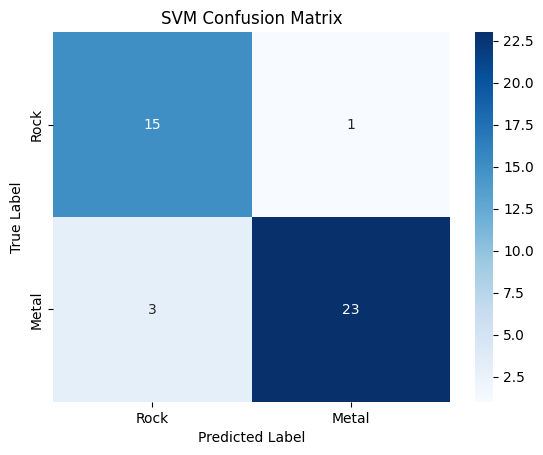

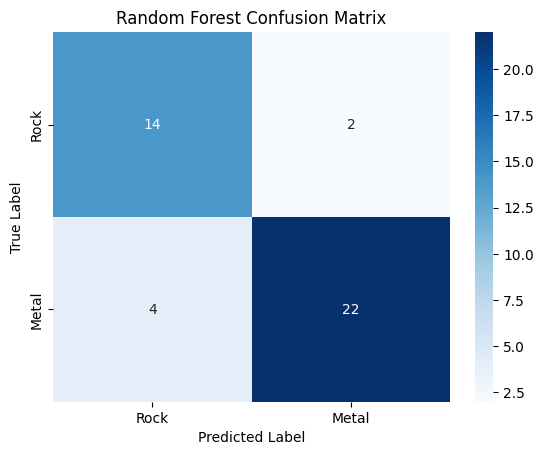

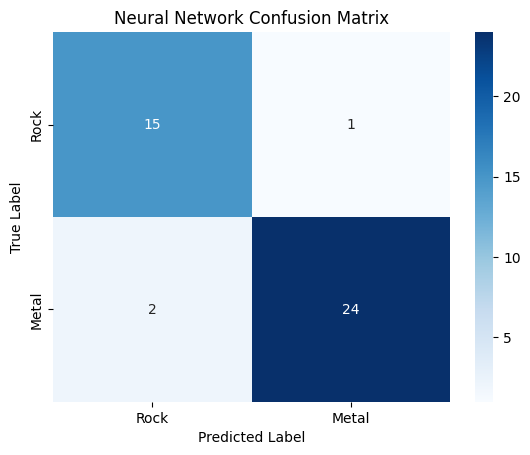

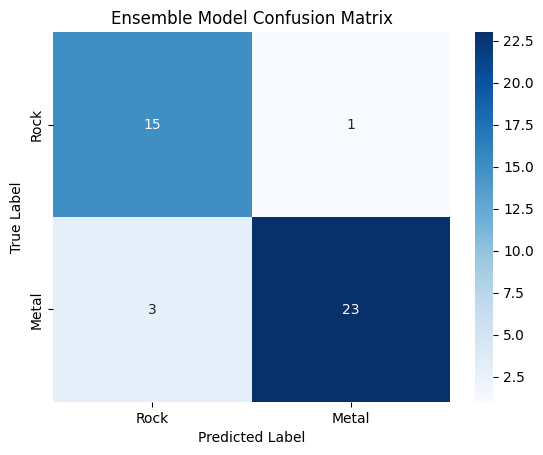

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url, header=None)

# Convert class labels from 'M' and 'R' to numeric (1 for Metal, 0 for Rock)
df[60] = df[60].map({'M': 1, 'R': 0})

# Separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into Training and Testing (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

# Create an ensemble classifier
ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('rf', rf_model),
    ('mlp', mlp_model)
], voting='hard')
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rock', 'Metal'], yticklabels=['Rock', 'Metal'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_svm, "SVM Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_mlp, "Neural Network Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_ensemble, "Ensemble Model Confusion Matrix")
